# Initial Exploratory Data Analysis of Audio Files

There are two general classifications of these audio files: 
* firearm discharge sounds
* non-firearm discharge sounds

In this notebook, I will explore the features that are present in the two categories. 

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import os
import pprint

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

colors=plt.cm.Purples(np.linspace(0,1,num=50))

mpl.rcParams.update({'figure.max_open_warning': 0})

## Data from ESC50

The ESC50 file is from the Environmental Sound Classification project: https://github.com/karolpiczak/ESC-50
* There are 50 categories
* This dataset has been reduced to include 11 audio clips for each category-->550 audio files

In [2]:
esc50path='../../Compile_firearm_sounds/non_fa_audio/'
esc50audio=os.listdir(path=esc50path)

## Using Librosa

## Helper Functions to Read Features
* **get_sound_wave** obtains the time domain signal of the audio file
* **get_mfcc** is a function to obtain the mel frequency cepstral coefficients (MFCC).  These coefficients a representation of sound from the frequency domain representation.
* **get_log_ms** obtains log melspectrogram of the audio. It is a scale that is "normalized" to match what a human ear can detect. 
* **get_rms** obtains the root-mean-square, or a representation of the effective value of the total wave form
* **get_spec_flat** obtains the spectral flatness, which is a way to quantify how tone-like a sound is, as opposed to  noise-like

In [3]:
def get_sound_wave(audio_path, filename):
    '''audio_path is the directory path defined relative to "notebooks" folder
    test_audio_path is the directory path defined rel to the "notebooks" folder'''
    y,sr=librosa.load(audio_path+filename,mono=True,duration=4)
    return y

In [4]:
def get_mfcc(y):
    '''y is an np.array of the sound wave from librosa.load()'''
    mfcc = librosa.feature.mfcc(y, n_mfcc=20)
    mfcc_flat=np.ndarray.flatten(mfcc)
    return mfcc_flat

In [5]:
def get_log_ms(y):
    '''y is an np.array of the sound wave from librosa.load()'''
    melspec=librosa.feature.melspectrogram(y)
    log_S=librosa.amplitude_to_db(melspec)
    logS_flat=log_S.reshape((1,len(log_S.flatten()))).T #make into a column
    return logS_flat

In [6]:
def get_rms(y):
    '''y is an np.array of the sound wave from librosa.load()'''
    rms_vals=librosa.feature.rms(y).T #convert to a column
    return rms_vals

In [7]:
def get_spec_flat(y):
    '''y is an np.array of the sound wave from librosa.load()'''
    specflat_vals=librosa.feature.spectral_flatness(y).T #convert to a column
    return specflat_vals

Next, I will combine the helper functions from above to compile all of the features into one dataframe for each feature from Librosa.  

**compileData** reads in empty dataframes for each feature.  The audio file is read with **get_sound_wave**.  The returned value from this is then fed to each of remaining helper functions above to obtain the feature of interest.  For each file, the feature is compiled in its respective dataframe. 

In [8]:
def compileData(sw_df,mfcc_df,logms_df,rms_df,sf_df,audio_path, filenamelist):
    '''sw_df,mfcc_df,logms_df,rms_df,sf_df are  empty pandas dataframes
    audio_path is the directory path defined relative to "notebooks" folder
    filenamelist is type list of strings of the names of the files of interest'''
    
    for filename in filenamelist:
        y=get_sound_wave(audio_path,filename)  
        sw_df=pd.concat([sw_df,pd.DataFrame(y)],axis=1)
        
        mfcc=get_mfcc(y)
        mfcc_df=pd.concat([mfcc_df,pd.DataFrame(mfcc)],axis=1)
        
        logS_flat=get_log_ms(y)
        logms_df=pd.concat([logms_df,pd.DataFrame(logS_flat)],axis=1)
        
        rms_vals=get_rms(y)
        rms_df=pd.concat([rms_df,pd.DataFrame(rms_vals)],axis=1)
        
        specflat_vals=get_spec_flat(y)
        sf_df=pd.concat([sf_df,pd.DataFrame(specflat_vals)],axis=1)
        
    return sw_df,mfcc_df,logms_df,rms_df,sf_df

Finally, call on **compileData** to obtain the features of interest for the non-firearm sounds. 

In [9]:
# empty dataframes for features of non-firearm sounds
sw_nonfa=pd.DataFrame() 
mfcc_nonfa=pd.DataFrame()
logms_nonfa=pd.DataFrame()
rms_nonfa=pd.DataFrame()
sf_nonfa=pd.DataFrame()

sw_nonfa,mfcc_nonfa,logms_nonfa,rms_nonfa,sf_nonfa=compileData(sw_nonfa,mfcc_nonfa,
                                                               logms_nonfa,rms_nonfa,
                                                               sf_nonfa,esc50path,
                                                               esc50audio)


Next, plot each of the features to understand what these look like for the non-firearm sounds. 

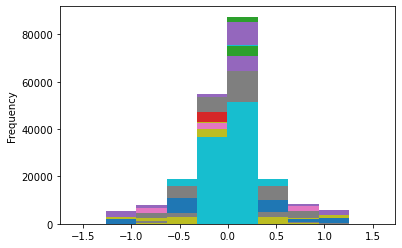

In [10]:
sw_nonfa.plot.hist(legend=False);

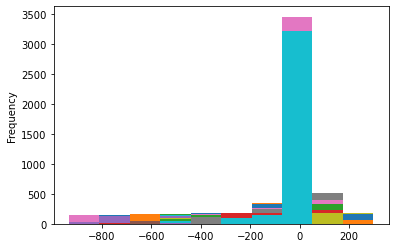

In [11]:
mfcc_nonfa.plot.hist(legend=False);

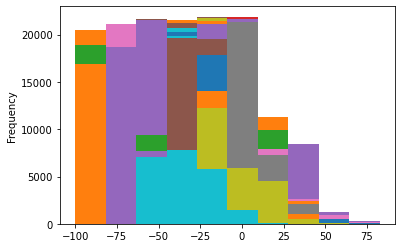

In [12]:
logms_nonfa.plot.hist(legend=False);

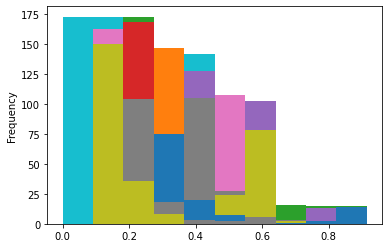

In [13]:
rms_nonfa.plot.hist(legend=False);

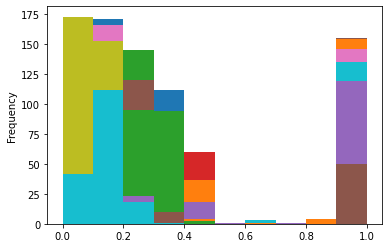

In [14]:
sf_nonfa.plot.hist(legend=False);

There's quite a lot going on in the graphs above.  Next, I am intersted in seeing how they compare to features compiled for the firearm sounds. 

## Firearm Sounds

Specify the path for the firearm sounds. 

In [15]:
fa_audio_path='../../Compile_firearm_sounds/fa_audio/'
firearm_filenames=os.listdir(path=fa_audio_path)
print(len(firearm_filenames))

562


Compile the features for the firearm sounds in their respective dataframes:

In [16]:
# empty dataframes for the firearm sound features
sw_fa=pd.DataFrame() 
mfcc_fa=pd.DataFrame()
logms_fa=pd.DataFrame()
rms_fa=pd.DataFrame()
sf_fa=pd.DataFrame()

sw_fa,mfcc_fa,logms_fa,rms_fa,sf_fa=compileData(sw_fa,mfcc_fa,
                                                logms_fa,rms_fa,
                                                sf_fa,fa_audio_path,
                                                firearm_filenames)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings

Next, plot each of the features for the firearm sounds to get an initial understanding of how the distributions for each feature appear. 

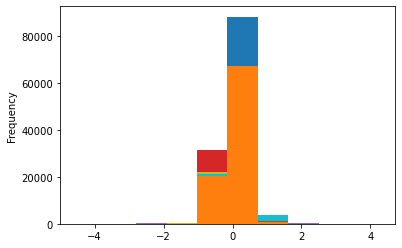

In [17]:
sw_fa.plot.hist(legend=False);

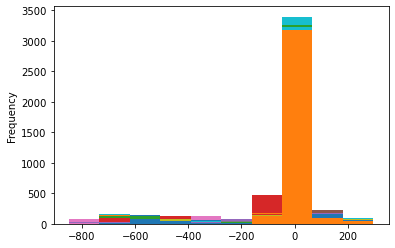

In [18]:
mfcc_fa.plot.hist(legend=False)

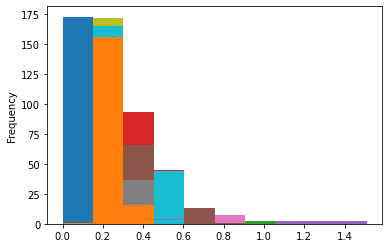

In [19]:
rms_fa.plot.hist(legend=False)

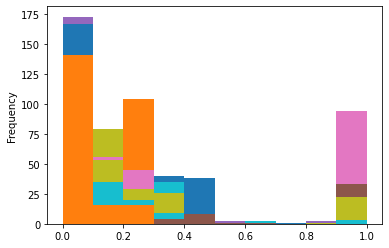

In [20]:
sf_fa.plot.hist(legend=False);

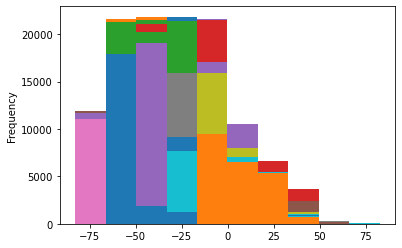

In [21]:
logms_fa.plot.hist(legend=False);

## Compare Firearm Sounds with Non-firearm Sounds

To more easily understand how the distributions compare for each class, I used the following helper function **compare_dist** to plot the features from the two classes together. 

In [36]:
def compare_dist(a_list,labels,xaxis_label):
    '''a_list is a list of dataframes for graphing
    label is a string for the x-axis label'''
    c=0
    sns.set_style(style='ticks')
    plt.figure(figsize=(3,3),dpi=180)
    for a in a_list:
        sns.distplot(a,kde_kws={"label": labels[c]})
        c+=1
    plt.xlabel(xaxis_label,fontsize=12)
    plt.ylabel('Probability Density')
    plt.tight_layout()

## Sound wave Comparison

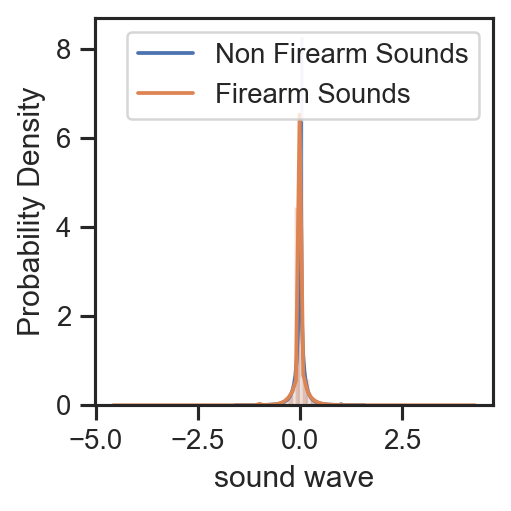

In [37]:
sns.set()
labels=['Non Firearm Sounds', 'Firearm Sounds']

compare_dist([sw_nonfa,sw_fa],labels,'sound wave')

It's a little difficult to see how the distributions are differing from one another.  Therefore, it will be help to perform a t-test to see if the averages of the distributions differ from one another: 

In [48]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sw_nonfa.sum(axis=1), sw_fa.sum(axis=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-3.598, p=0.000
Different distributions (reject H0)


## MFCC Comparison

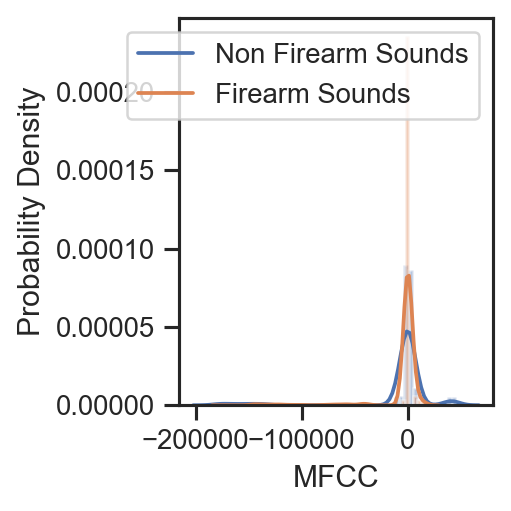

In [39]:
compare_dist([m_nonfa,m_fa],labels,'MFCC')

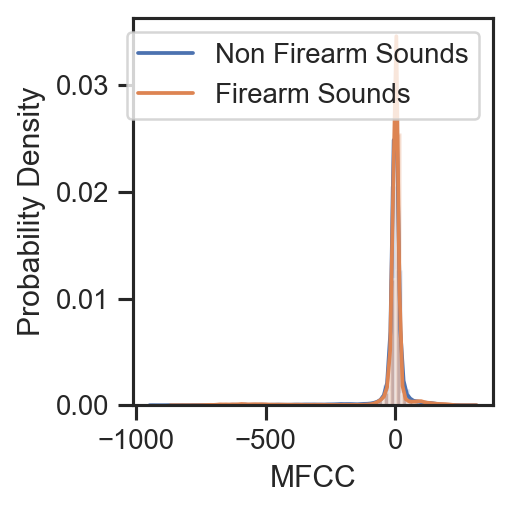

In [40]:
compare_dist([mfcc_nonfa,mfcc_fa],labels,'MFCC')

In [38]:
m_nonfa=mfcc_nonfa.sum(axis=1)
m_fa=mfcc_fa.sum(axis=1)
type(m_nonfa)

pandas.core.series.Series

In [41]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(m_nonfa, m_fa)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.906, p=0.004
Different distributions (reject H0)


## log MS Comparison

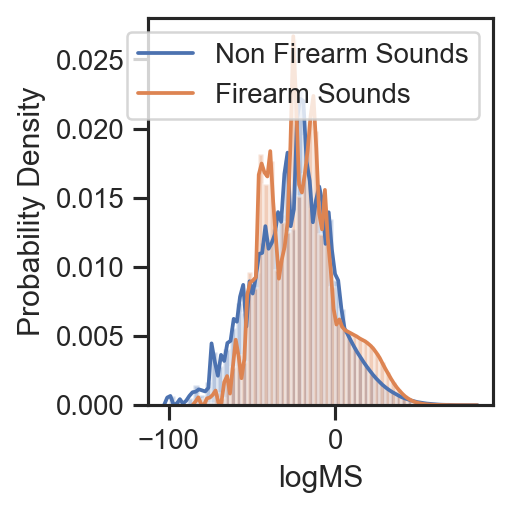

In [42]:
compare_dist([logms_nonfa,logms_fa],labels,'logMS')

In [45]:
stat, p = ttest_ind(logms_nonfa.sum(axis=1), logms_fa.sum(axis=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-302.651, p=0.000
Different distributions (reject H0)


## Spectral Flatness Comparison

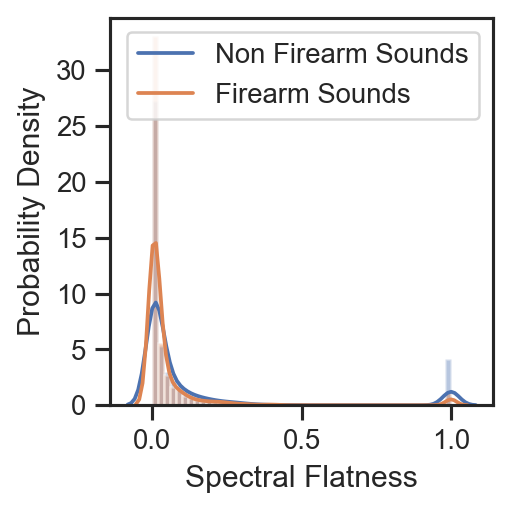

In [43]:
compare_dist([sf_nonfa,sf_fa],labels,'Spectral Flatness')

In [46]:
stat, p = ttest_ind(sf_nonfa.sum(axis=1), sf_fa.sum(axis=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=19.610, p=0.000
Different distributions (reject H0)


## RMS Comparison

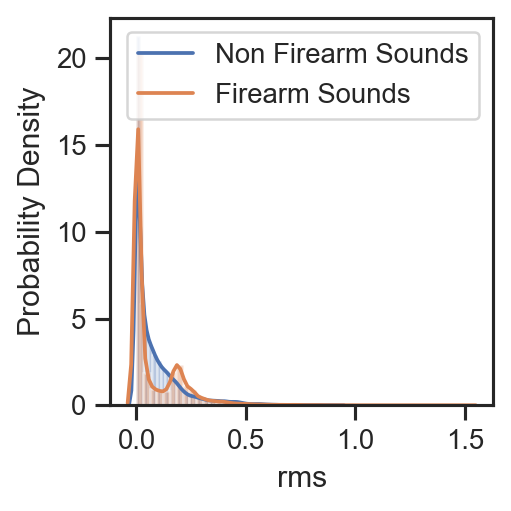

In [44]:
compare_dist([rms_nonfa,rms_fa],labels,'rms')

In [47]:
stat, p = ttest_ind(rms_nonfa.sum(axis=1), rms_fa.sum(axis=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=10.419, p=0.000
Different distributions (reject H0)
